In [1]:
import os
import sys
import numpy as np
import pandas as pd
from statistics import mean 
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import com_func

run = "_r9"

Dataset = "pubmed"
result_path = "../../result/"+Dataset+"/3_co_train_sample=140k/"
filter_size = 100
fig_save_path = "../../plot/3_co_train_detail_plots/threshold="+str(filter_size)+"/V1=pv_dbow_V2=n2v"+run+"/"

# Compare co-training (muti-view) with supervised method (feature concatenation) Phase 1: extract result

In [2]:
"""# --------------- Co-training --------------------- #"""
''' plot all selected method with fixed threshold '''
step_threshold = 100
initial_labeled_size = 10
textual_embedding = ["pv_dbow"]
citation_embedding = ["n2v"]
all_method = []
all_method_details =[]
textual_embedding_result = []
#textual_embedding_svm_result = []
# ---------- load different algorithm result ------------------- #
for v1_emb,v2_emb in zip(textual_embedding,citation_embedding):
    # --------------------- textual only file name --------------------------- #
    result_filename = "(init_labeled_size="+str(initial_labeled_size)+") V1="+v1_emb+"_V2="+v2_emb+"_threshold="+str(step_threshold)+run+".csv"
    final_path = os.path.normpath(os.path.join(result_path,result_filename))
    result = pd.read_csv(final_path)
    all_method_details = result["All_fold_details"]
    # ----------------------- read result data in --------------------- #
    for col in result.columns: 
        if "f1" in col:
            print(col)
            if col in ["LR-UB_f1", "SVM-UB_f1"]:
                print("removed")
            elif col == "LR-LB_f1":
                textual_embedding_result.append(result[col].values)
                all_method.append("LR")
            elif col == "SVM-LB_f1":
                textual_embedding_result.append(result[col].values)
                all_method.append("SVM")
            else:
                textual_embedding_result.append(result[col].values)
                all_method.append(col[0:-3].upper())

#print(all_method_details)
name_group = result["Name"].values
#print(all_method)
#print(textual_embedding_result)
#print(name_group)

co_LR_f1
co_SVM_f1
co_LR_SVM_f1
Improved_co_LR_f1
LR-UB_f1
removed
LR-LB_f1
SVM-UB_f1
removed
SVM-LB_f1


In [3]:
print(all_method)
print(textual_embedding_result)

['CO_LR', 'CO_SVM', 'CO_LR_SVM', 'IMPROVED_CO_LR', 'LR', 'SVM']
[array([0.96316295, 0.98798577, 0.97819167, 0.97805267, 0.98471342,
       0.98872305, 0.99116541, 0.94835921, 0.99411765, 0.98820407,
       0.94657719, 0.9959986 , 0.97689535, 0.98961039, 0.98538293]), array([0.96325539, 0.98798577, 0.981098  , 0.96932819, 0.97427088,
       0.98886337, 0.9868396 , 0.9482665 , 0.99705309, 0.98820407,
       0.9491762 , 0.9959986 , 0.96795863, 0.8942205 , 0.98304226]), array([0.95916559, 0.98401254, 0.98119899, 0.98249711, 0.97427088,
       0.98138592, 0.99116541, 0.94145949, 0.99411255, 0.98818912,
       0.95169503, 0.9959986 , 0.97250268, 0.98976173, 0.98298442]), array([0.95513657, 0.99195901, 0.98086662, 0.97805267, 0.95920651,
       0.97721146, 0.9868396 , 0.94487277, 0.99411765, 0.99216573,
       0.94645044, 0.98816727, 0.99543124, 0.98961039, 0.99021847]), array([0.95498756, 0.97994478, 0.96133357, 0.94270584, 0.96408907,
       0.9734875 , 0.9868396 , 0.96206987, 0.99705309, 0

# Phase 2: Plot 1: Plot mean result

In [4]:
# exclude LR-UB, SVM-UB
all_method_exclude_UB = []
textual_embedding_result_no_UB = []
for pos, (method, result) in enumerate(zip(all_method, textual_embedding_result)):
    if method not in ["LR-UB", "SVM-UB"]:
        all_method_exclude_UB.append(method)
        textual_embedding_result_no_UB.append(result)
print(all_method_exclude_UB)
print(textual_embedding_result_no_UB)

['CO_LR', 'CO_SVM', 'CO_LR_SVM', 'IMPROVED_CO_LR', 'LR', 'SVM']
[array([0.96316295, 0.98798577, 0.97819167, 0.97805267, 0.98471342,
       0.98872305, 0.99116541, 0.94835921, 0.99411765, 0.98820407,
       0.94657719, 0.9959986 , 0.97689535, 0.98961039, 0.98538293]), array([0.96325539, 0.98798577, 0.981098  , 0.96932819, 0.97427088,
       0.98886337, 0.9868396 , 0.9482665 , 0.99705309, 0.98820407,
       0.9491762 , 0.9959986 , 0.96795863, 0.8942205 , 0.98304226]), array([0.95916559, 0.98401254, 0.98119899, 0.98249711, 0.97427088,
       0.98138592, 0.99116541, 0.94145949, 0.99411255, 0.98818912,
       0.95169503, 0.9959986 , 0.97250268, 0.98976173, 0.98298442]), array([0.95513657, 0.99195901, 0.98086662, 0.97805267, 0.95920651,
       0.97721146, 0.9868396 , 0.94487277, 0.99411765, 0.99216573,
       0.94645044, 0.98816727, 0.99543124, 0.98961039, 0.99021847]), array([0.95498756, 0.97994478, 0.96133357, 0.94270584, 0.96408907,
       0.9734875 , 0.9868396 , 0.96206987, 0.99705309, 0

In [5]:
# sort result wrt improved co-train
sorted_co_lr_idx = []
for method, result in zip(all_method_exclude_UB, textual_embedding_result_no_UB):
    if method =="IMPROVED_CO_LR":
        sorted_co_lr_idx = np.argsort(result)
        
sorted_all_result = []
sorted_exclude_UB_result = []

for result in textual_embedding_result:
    sorted_all_result.append(result[sorted_co_lr_idx])

for result in textual_embedding_result_no_UB:
    sorted_exclude_UB_result.append(result[sorted_co_lr_idx])

sorted_name_group = name_group[sorted_co_lr_idx]

#print(sorted_name_group)
#print(sorted_all_result)
#print(all_method_exclude_upper_bound)

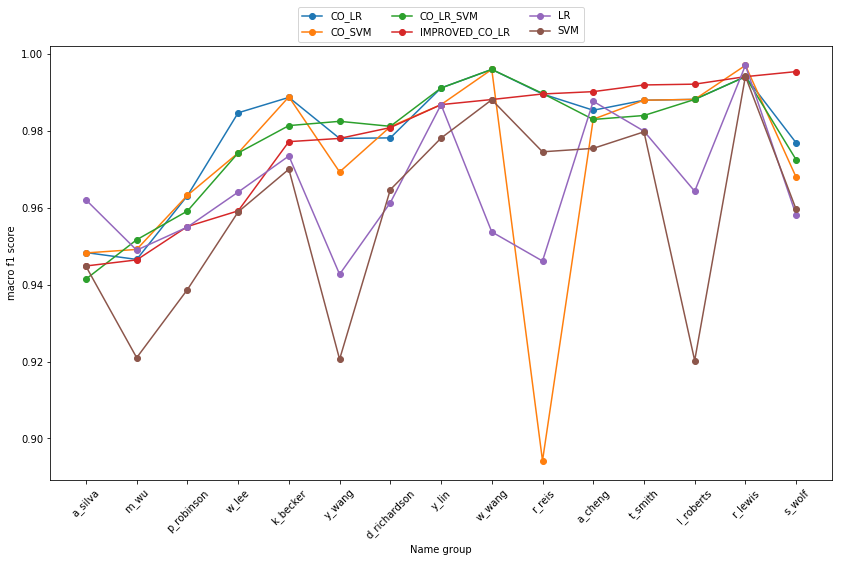

In [6]:
# -------------------- plot all together ------------------- #
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,8))
ax = plt.axes()
for algo, result in zip(all_method_exclude_UB, sorted_exclude_UB_result):
    plt.xticks(range(len(result)), sorted_name_group)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
    plt.plot(result, marker='o', label=algo)
ax.autoscale_view()
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=3)
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
#plt.savefig(fname=fig_save_path+'all_method_mean_result.eps', dpi=150, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# Phase 2: Plot 2. Plot upper/lower bound result for each method and co-train to verify improvement

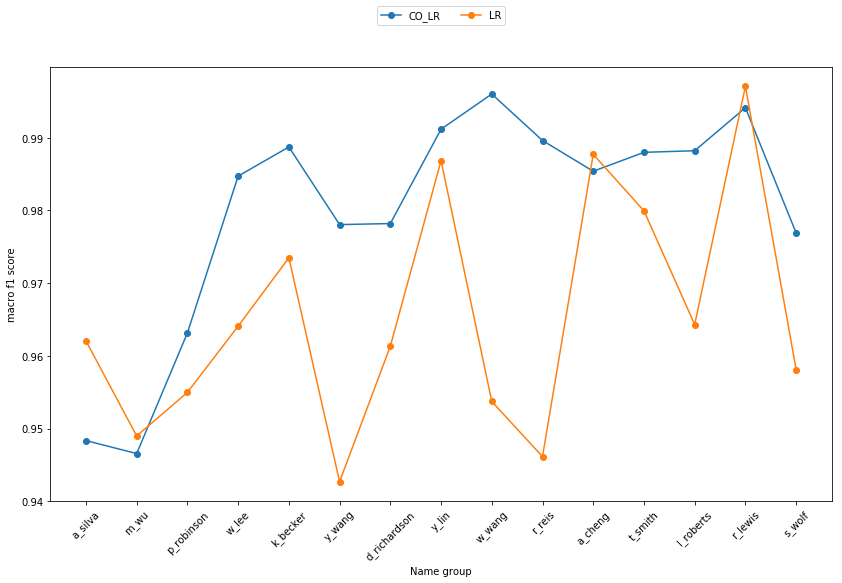

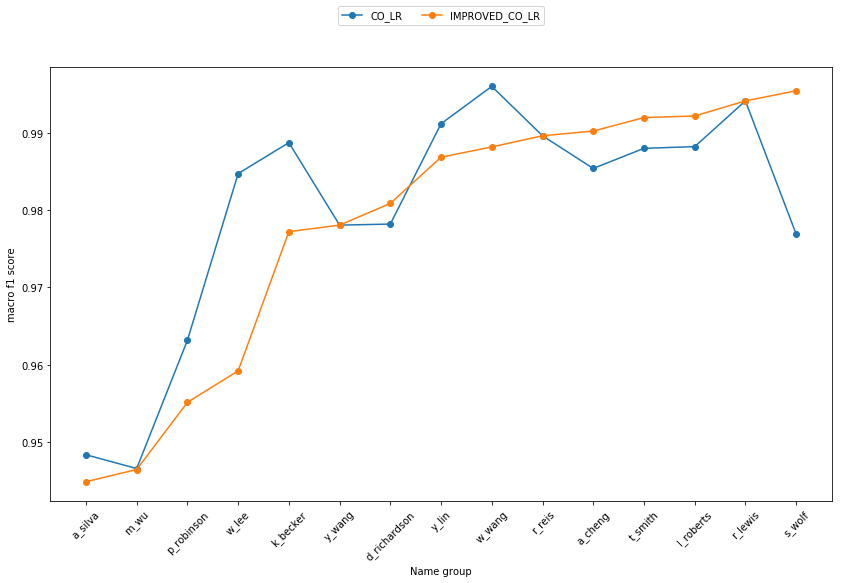

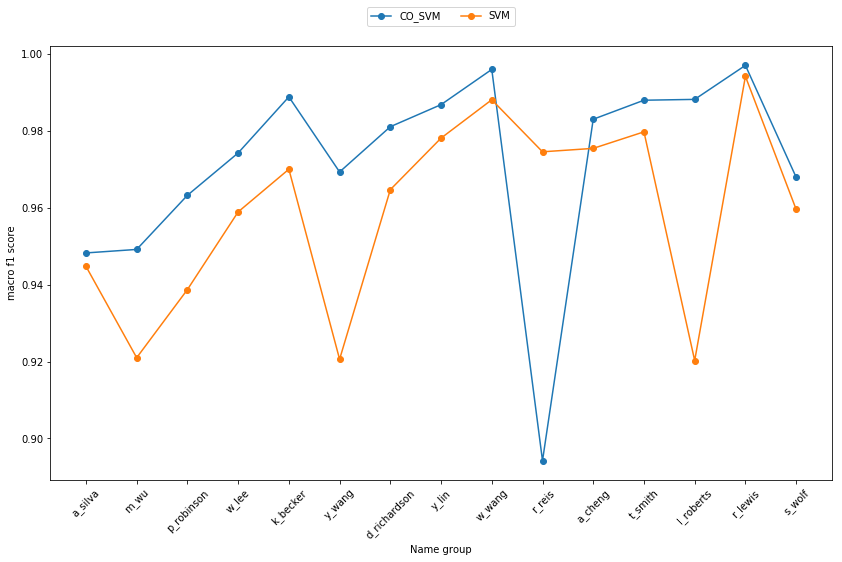

In [7]:
# ------------------------ plot LR and related works ----------------------------- #
fig = plt.figure(figsize=(14,8))
ax = plt.axes()
for algo, result in zip(all_method, sorted_all_result):
    if algo in ["LR", "CO_LR"]:
        plt.xticks(range(len(result)), sorted_name_group)
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
        plt.plot(result, marker='o', label=algo)
ax.autoscale_view()
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=3)
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
#plt.savefig(fname=fig_save_path+'LR_vs_CO-LR_result.png', dpi=150, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(14,8))
ax = plt.axes()
for algo, result in zip(all_method, sorted_all_result):
    if algo in ["CO_LR", "IMPROVED_CO_LR"]:
        plt.xticks(range(len(result)), sorted_name_group)
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
        plt.plot(result, marker='o', label=algo)
ax.autoscale_view()
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=3)
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
#plt.savefig(fname=fig_save_path+'CO-LR_vs_ICO-LR_result.png', dpi=150, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()
# ------------------------ plot SVM and related works ----------------------------- #
fig = plt.figure(figsize=(14,8))
ax = plt.axes()
for algo, result in zip(all_method, sorted_all_result):
    if algo in ["SVM", "CO_SVM"]:
        plt.xticks(range(len(result)), sorted_name_group)
        plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
        plt.plot(result, marker='o', label=algo)
ax.autoscale_view()
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=3)
plt.xlabel('Name group')
plt.ylabel('macro f1 score')
#plt.savefig(fname=fig_save_path+'SVM_core_mean_result.png', dpi=150, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# Phase 3: Plot 1. Plot per fold variance for all method

In [8]:
import ast
cotrain_all_per_fold_result= {}

for author in all_method_details:
    per_fold_f1 = collections.defaultdict(list)
    author = ast.literal_eval(author)
    for per_fold_details in author:
        #print(per_fold_details)
        for key in per_fold_details:
            if key in ['co_LR f1','co_SVM f1','co_LR_SVM f1','Improved_co_LR f1','LR-UB f1','SVM-UB f1','LR-LB f1','SVM-LB f1']:
                per_fold_f1[key].append(per_fold_details[key])
    cotrain_all_per_fold_result[author[0]['author']]=(per_fold_f1)
#print(cotrain_all_per_fold_result)

In [9]:
name_list = list(cotrain_all_per_fold_result.keys())
method_list = []
f1_mean = collections.defaultdict(list)
f1_min = collections.defaultdict(list)
f1_max = collections.defaultdict(list)
for author, author_result in cotrain_all_per_fold_result.items():
    print(author)
    for method, method_result in author_result.items():
        method_temp = method.replace(' f1','').upper()
        if method_temp in ["LR-UB", "SVM-UB"]:
            print("remove upper bound")
        else:
            if method_temp == "LR-LB":
                method_temp = "LR"
            if method_temp == "SVM-LB":
                method_temp = "SVM"
            if method_temp not in method_list:
                method_list.append(method_temp)
            f1_mean[method_temp].append(np.mean(method_result))
            f1_min[method_temp].append(np.min(method_result))
            f1_max[method_temp].append(np.max(method_result))
            print(method_result, " mean: ", np.mean(method_result), " min: ",np.min(method_result)," max: ", np.max(method_result))
print(name_list)
print(method_list)

p_robinson
remove upper bound
remove upper bound
[1.0, 0.9591666666666667, 0.9180602006688963, 0.9795577805590321, 0.9590301003344481]  mean:  0.9631629496458085  min:  0.9180602006688963  max:  1.0
[0.9797979797979798, 0.9590301003344481, 0.9183333333333332, 0.9795577805590321, 0.9795577805590321]  mean:  0.963255394916765  min:  0.9183333333333332  max:  0.9797979797979798
[0.9799277398635087, 0.9386733416770963, 0.9590301003344481, 0.9591666666666667, 0.9590301003344481]  mean:  0.9591655897752336  min:  0.9386733416770963  max:  0.9799277398635087
[0.9399759903961584, 0.9587542087542087, 0.9383647798742139, 0.9795577805590321, 0.9590301003344481]  mean:  0.9551365719836123  min:  0.9383647798742139  max:  0.9795577805590321
[0.9599358974358974, 0.9386733416770963, 0.9590301003344481, 0.9794549266247379, 0.9378435517970402]  mean:  0.954987563573844  min:  0.9378435517970402  max:  0.9794549266247379
[0.92, 0.9386733416770963, 0.9591666666666667, 0.9591666666666667, 0.91666666666666

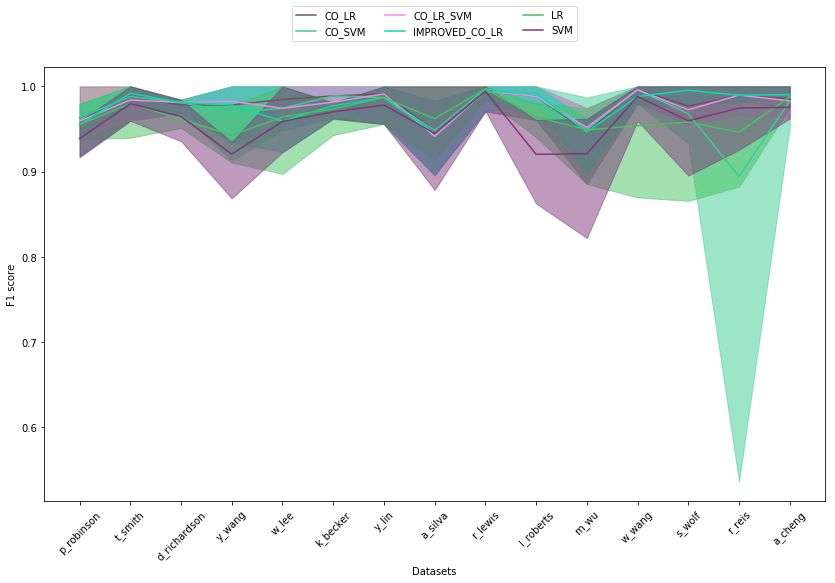

In [10]:
from matplotlib import pyplot as plt
import numpy as np

y_scale_p1 = [0,1]
x = name_list
random_color = np.random.rand(len(method_list),3)

plt.figure(figsize=(14,8))

for idx, method in enumerate(method_list):
    y = f1_mean[method]
    y_min = f1_min[method]
    y_max = f1_max[method]
    
    plt.plot(x, y, 'k', color = random_color[idx], label=method)
    plt.fill_between(x, y_min, y_max, alpha=0.5, edgecolor = random_color[idx], facecolor=random_color[idx])
    plt.xticks(rotation=45, horizontalalignment='center')
    
    y_scale_p1 = plt.gca().get_ylim()

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"all_method_result_variance.png", dpi=150)
plt.show()

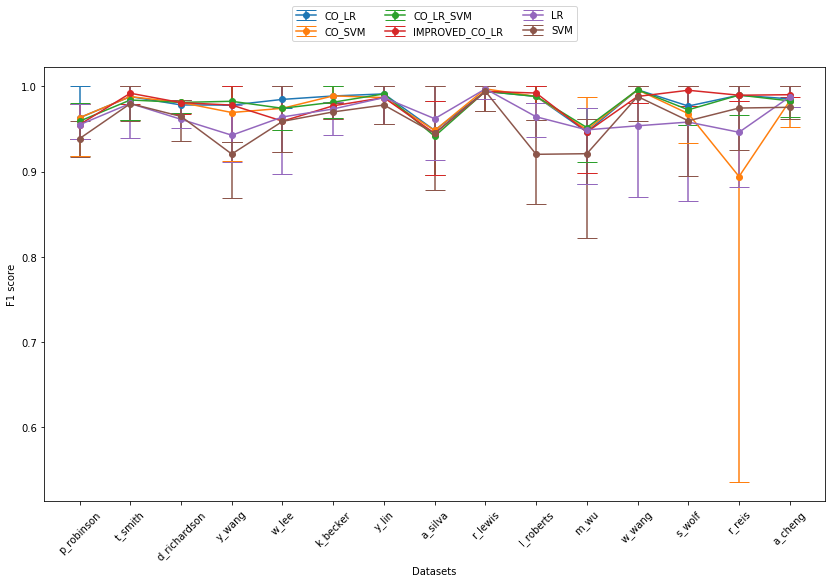

In [12]:
y_scale_p2 = [0,1]
x = name_list

fig, ax = plt.subplots(figsize=(14,8))

for idx, method in enumerate(method_list):
    y = f1_mean[method]
    y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
    y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
    y_error = [y_min_error,y_max_error]

    (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
    for cap in caps:
        cap.set_markeredgewidth(1)
    plt.xticks(rotation=45, horizontalalignment='center')
    y_scale_p2 = plt.gca().get_ylim()

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"all_method_result_variance.png", dpi=150)
plt.show()

# Phase 3: Plot 2. Plot per fold variance for each method

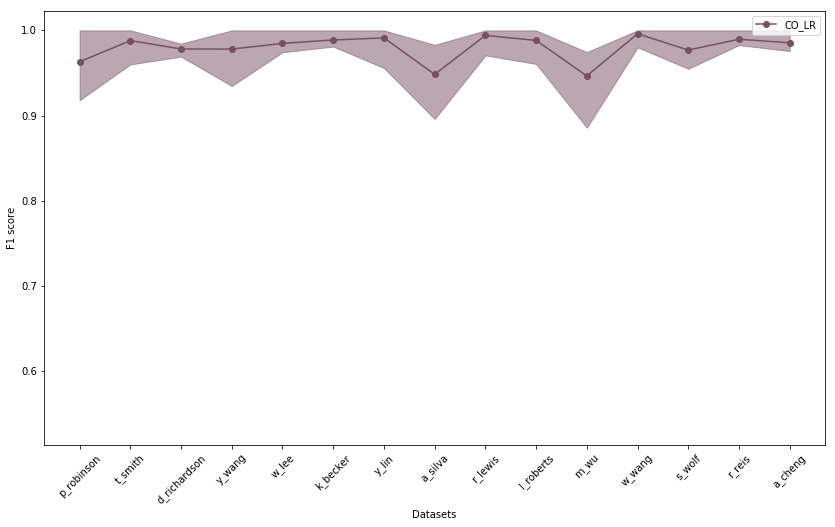

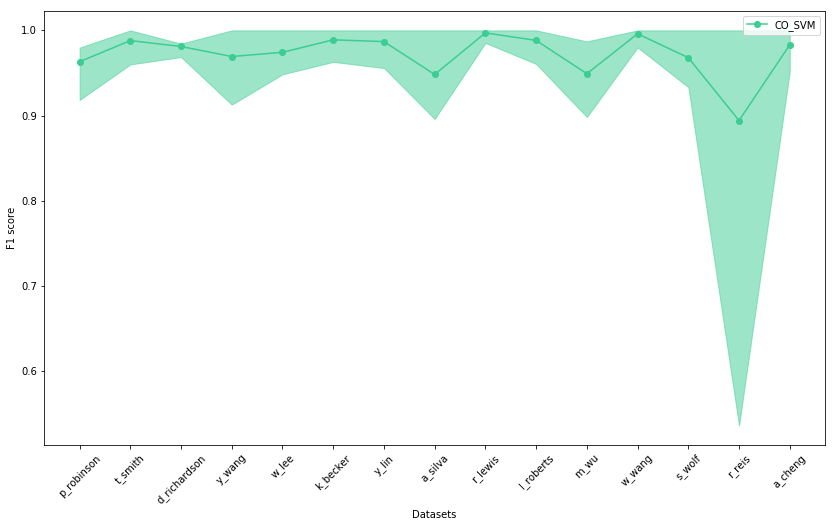

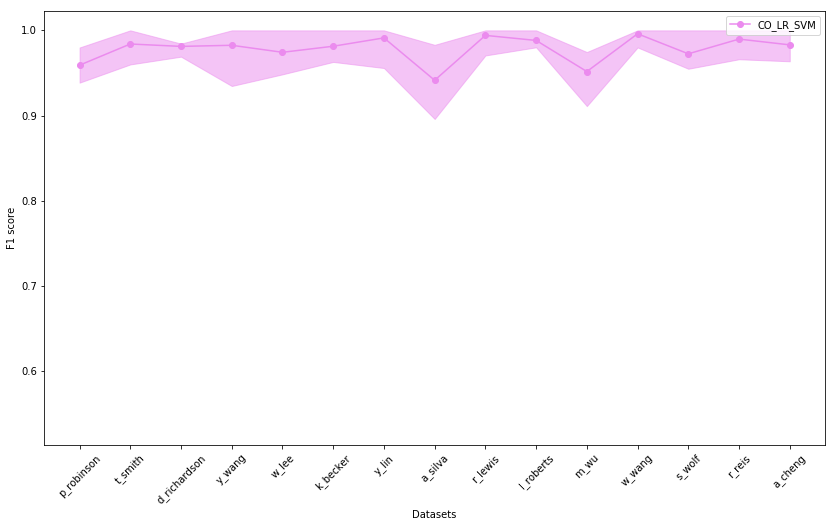

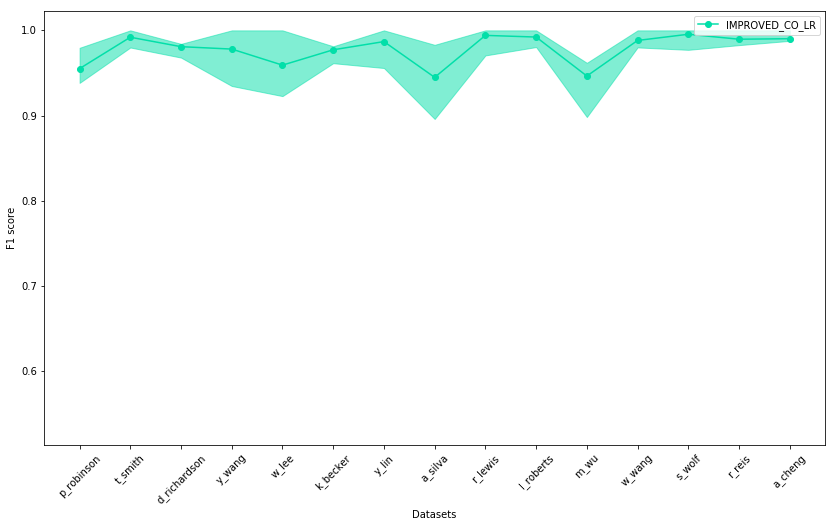

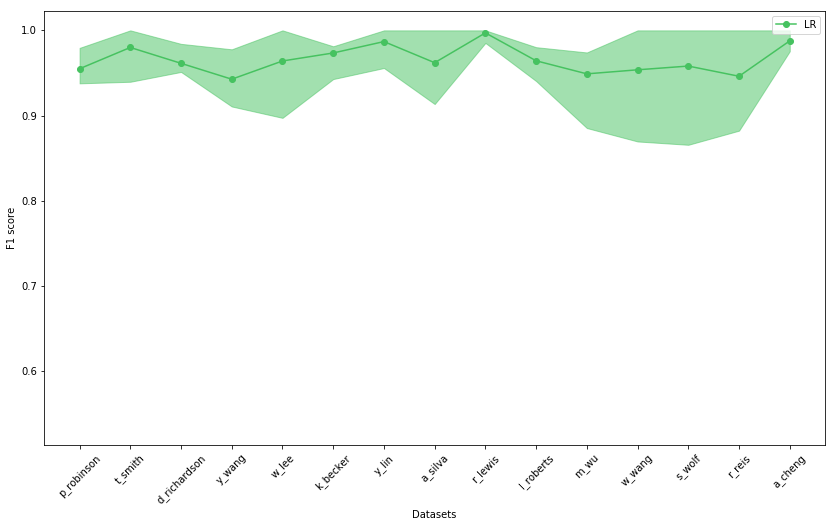

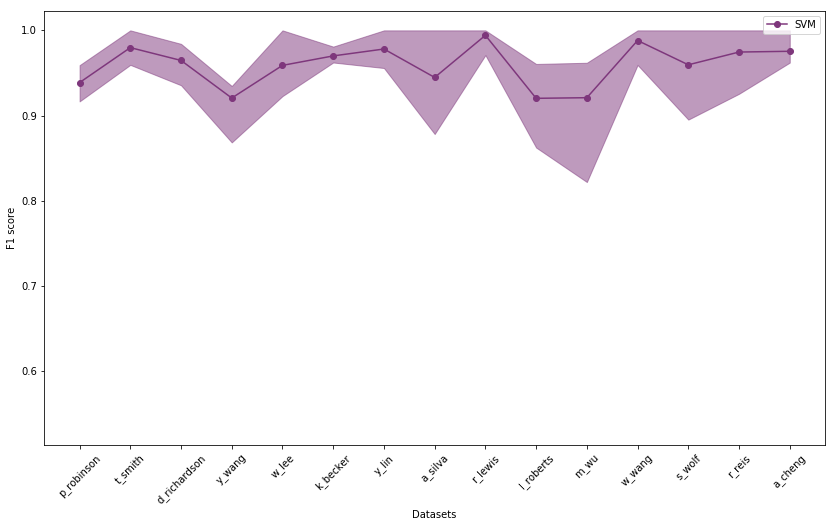

(0.5130066545674531, 1.0231901593063117)


In [13]:
for idx, method in enumerate(method_list):
    plt.figure(figsize=(14,8))
    x = name_list
    y = f1_mean[method]
    y_min = f1_min[method]
    y_max = f1_max[method]
    
    plt.plot(x, y, 'k', color = random_color[idx],marker='o', label=method)
    plt.ylim(y_scale_p1)
    plt.fill_between(x, y_min, y_max, alpha=0.5, edgecolor = random_color[idx], facecolor=random_color[idx])
    plt.xticks(rotation=45, horizontalalignment='center')
    legend = plt.legend()
    plt.xlabel('Datasets')
    plt.ylabel('F1 score')
    #plt.savefig(fig_save_path+method+"_result_variance.png", dpi=150)
    plt.show()
print(y_scale_p1)

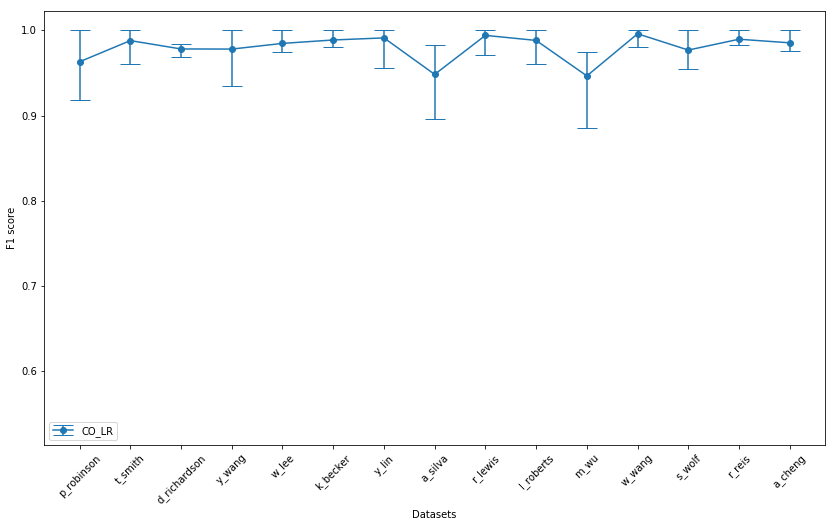

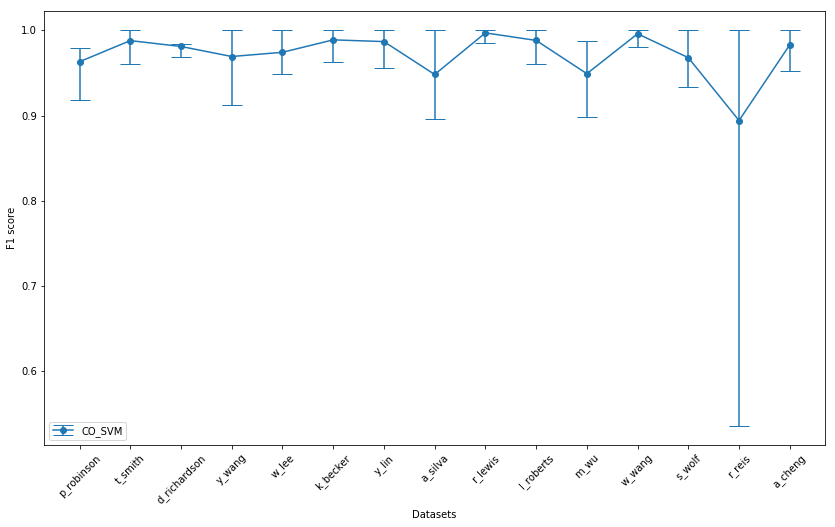

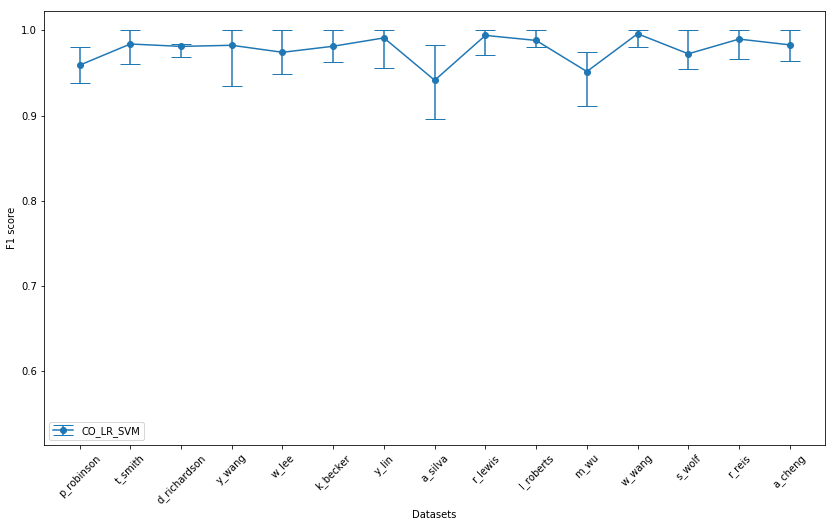

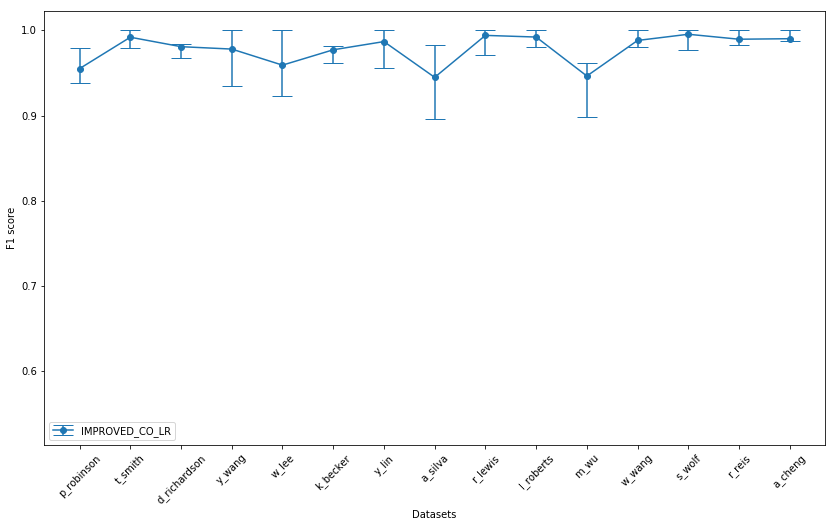

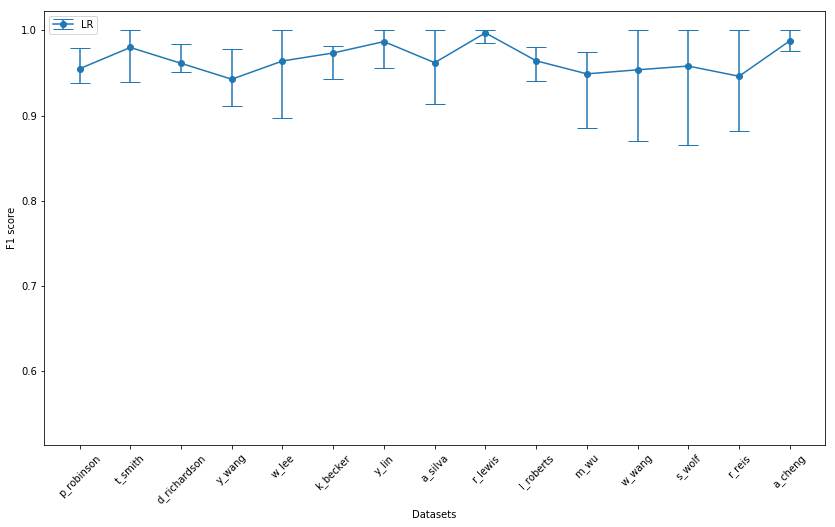

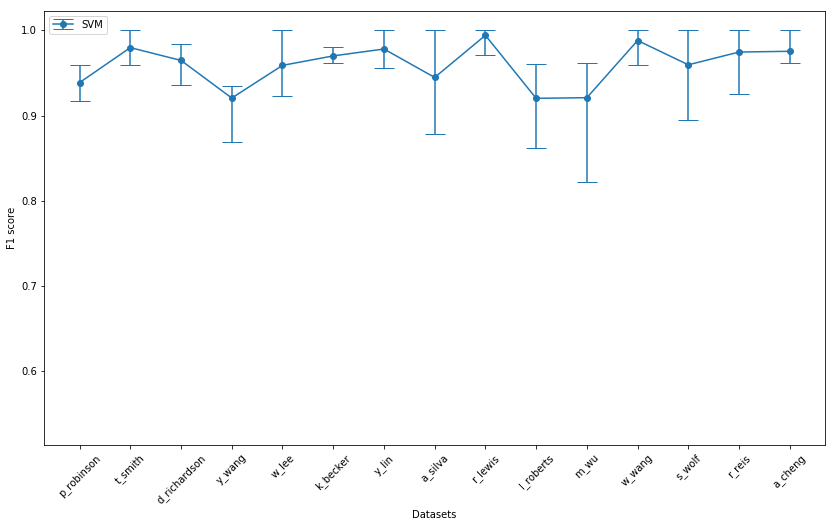

(0.5130066545674531, 1.0231901593063117)


In [14]:
for idx, method in enumerate(method_list):
    fig, ax = plt.subplots(figsize=(14,8))
    x = name_list
    y = f1_mean[method]
    y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
    y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
    y_error = [y_min_error,y_max_error]

    (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
    plt.ylim(y_scale_p2)
    for cap in caps:
        cap.set_markeredgewidth(1)
    plt.xticks(rotation=45, horizontalalignment='center')
    legend = plt.legend()
    plt.xlabel('Datasets')
    plt.ylabel('F1 score')
    #plt.savefig(fig_save_path+method+"_result_variance.png", dpi=150)
    plt.show()
print(y_scale_p2)

# Phase 3: Plot 3. Plot per fold variance for LR/SVM based method

In [15]:
# combined lR methods together
print(name_list)
print(method_list)
print(f1_mean)
print(f1_min)
print(f1_max)

['p_robinson', 't_smith', 'd_richardson', 'y_wang', 'w_lee', 'k_becker', 'y_lin', 'a_silva', 'r_lewis', 'l_roberts', 'm_wu', 'w_wang', 's_wolf', 'r_reis', 'a_cheng']
['CO_LR', 'CO_SVM', 'CO_LR_SVM', 'IMPROVED_CO_LR', 'LR', 'SVM']
defaultdict(<class 'list'>, {'CO_LR': [0.9631629496458085, 0.9879857729428903, 0.9781916664698773, 0.9780526691956677, 0.9847134188597604, 0.9887230483969092, 0.9911654135338346, 0.9483592084790281, 0.9941176470588236, 0.9882040746447526, 0.9465771932699548, 0.9959985959985961, 0.9768953465099102, 0.9896103896103897, 0.9853829288136537], 'CO_SVM': [0.963255394916765, 0.9879857729428903, 0.9810979978480068, 0.9693281903648059, 0.9742708803684413, 0.9888633704978285, 0.9868395966907604, 0.9482664966370329, 0.997053087757313, 0.9882040746447526, 0.9491761988683172, 0.9959985959985961, 0.9679586341078277, 0.8942204975819747, 0.9830422578343997], 'CO_LR_SVM': [0.9591655897752336, 0.9840125391849529, 0.9811989898792314, 0.9824971136401122, 0.9742708803684413, 0.9813

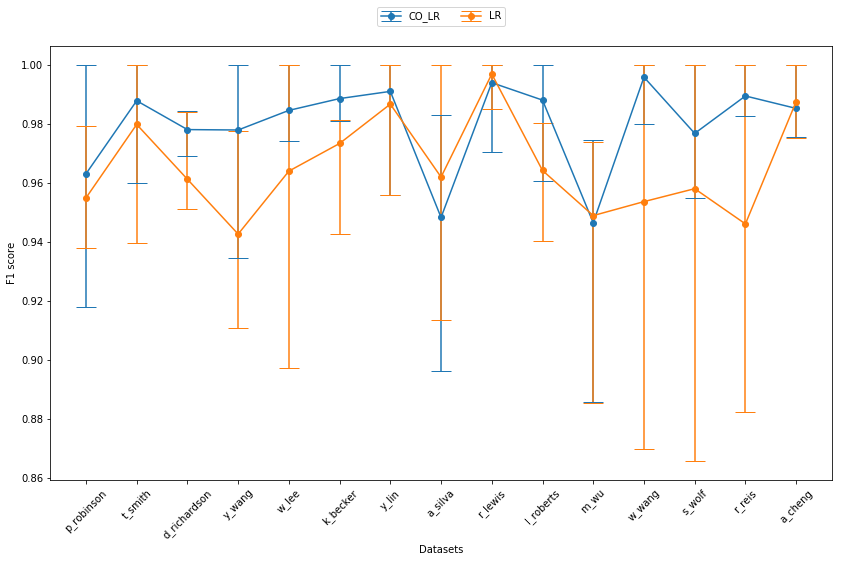

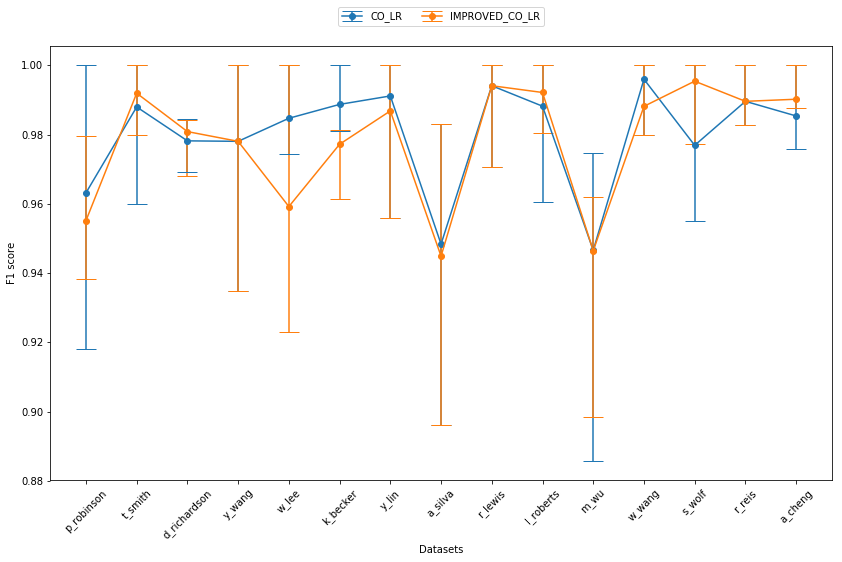

In [16]:
fig, ax = plt.subplots(figsize=(14,8))

for idx, method in enumerate(method_list):
    if method in ["CO_LR","LR"]:
        y = f1_mean[method]
        y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
        y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
        y_error = [y_min_error,y_max_error]

        (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
        for cap in caps:
            cap.set_markeredgewidth(1)
        plt.xticks(rotation=45, horizontalalignment='center')

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"LR_vs_CoLR_result_variance.png", dpi=150)
plt.show()


fig, ax = plt.subplots(figsize=(14,8))

for idx, method in enumerate(method_list):
    if method in ["CO_LR","IMPROVED_CO_LR"]:
        y = f1_mean[method]
        y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
        y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
        y_error = [y_min_error,y_max_error]

        (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
        for cap in caps:
            cap.set_markeredgewidth(1)
        plt.xticks(rotation=45, horizontalalignment='center')

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"CoLR_vs_ICoLR_result_variance.png", dpi=150)
plt.show()

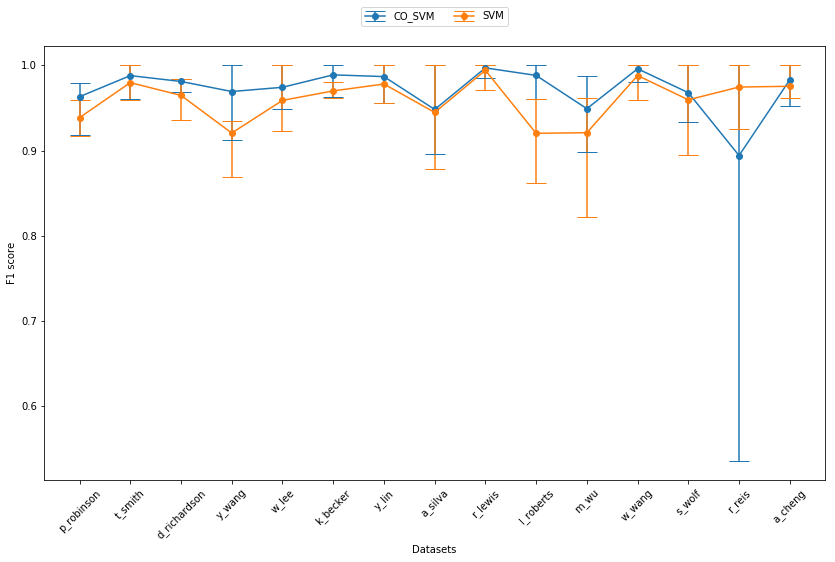

In [17]:
fig, ax = plt.subplots(figsize=(14,8))

for idx, method in enumerate(method_list):
    if method in ["SVM","CO_SVM"]:
        y = f1_mean[method]
        y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
        y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
        y_error = [y_min_error,y_max_error]

        (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
        for cap in caps:
            cap.set_markeredgewidth(1)
        plt.xticks(rotation=45, horizontalalignment='center')

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"SVM_result_variance.png", dpi=150)
plt.show()

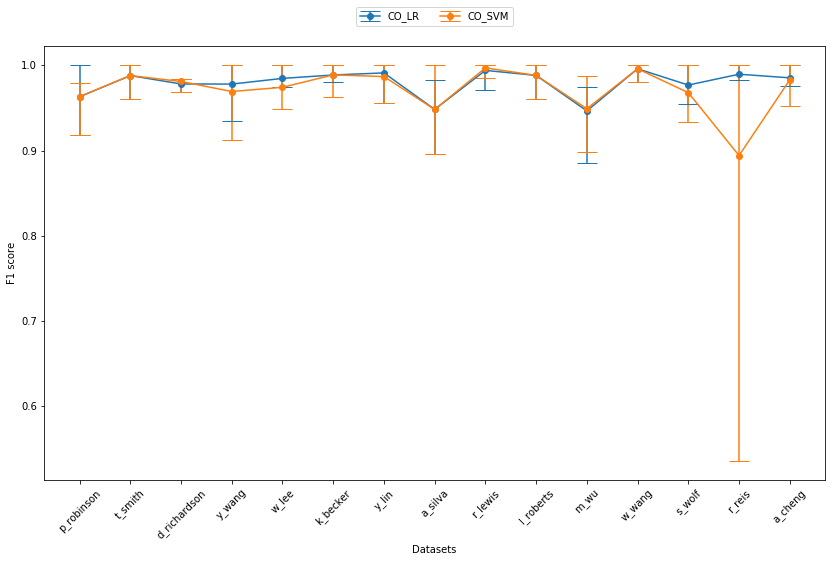

In [19]:
fig, ax = plt.subplots(figsize=(14,8))

for idx, method in enumerate(method_list):
    if method in ["CO_LR","CO_SVM"]:
        y = f1_mean[method]
        y_min_error = [a - b for a, b in zip(f1_mean[method], f1_min[method])]
        y_max_error = [a - b for a, b in zip(f1_max[method], f1_mean[method])]
        y_error = [y_min_error,y_max_error]

        (_, caps, _) = ax.errorbar(x, y,yerr=y_error, fmt='-o',capsize=10, label=method)
        for cap in caps:
            cap.set_markeredgewidth(1)
        plt.xticks(rotation=45, horizontalalignment='center')

legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xlabel('Datasets')
plt.ylabel('F1 score')
#plt.savefig(fig_save_path+"CoSVM_vs_CoLR_result_variance.png", dpi=150)
plt.show()